# Idea: Exploratory Data Analysis (EDA) on Retail Sales Data

# Description:

In this project, we will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

# Key Concepts and Challenges:

1 Data Loading and Cleaning: Load the retail sales dataset.                                                                                             
2 Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).                                                          
3 Time Series Analysis: Analyze sales trends over time using time series techniques.                                                                    
4 Customer and Product Analysis: Analyze customer demographics and purchasing behavior.                                                                 
5 Visualization: Present insights through bar charts, line plots, and heatmaps.                                                                         
6 Recommendations: Provide actionablle recommendations based on the EDA.                                                                                

# 1 Data Loading and Cleaning

In [1]:
import pandas as pd

In [2]:
# Load dataset
data = pd.read_csv('retail_sales_dataset.csv')

In [3]:
# Inspect data
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [5]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# 2. Descriptive Statistics

In [6]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# 3 Time Series Analysis

In [7]:
import matplotlib.pyplot as plt

In [8]:
# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
# Set Date as index
data.set_index('Date',inplace=True)

C:\Users\Nidhi Kushwaha\AppData\Local\Temp\ipykernel_19460\2154485473.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Total Amount'].resample('M').sum().plot()


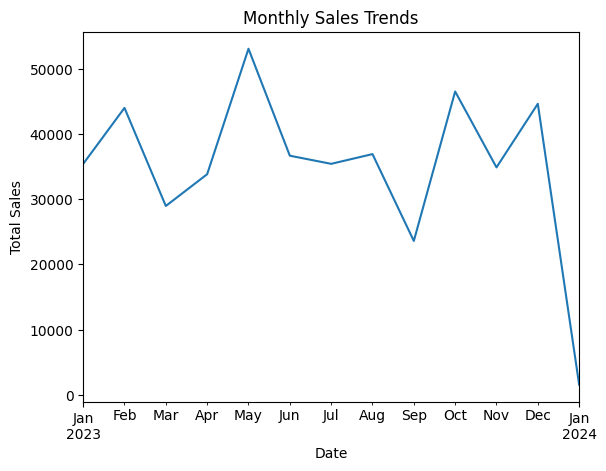

In [10]:
# Plot sales trends
data['Total Amount'].resample('M').sum().plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

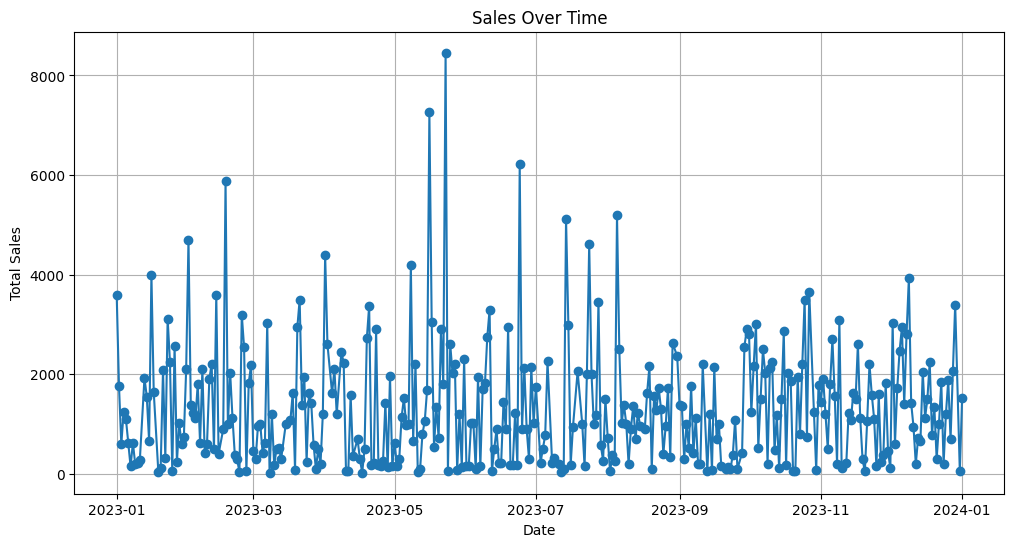

In [29]:
# Time Series Analysis
sales_trend = data.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# 4. Customer and Product Analysis


Text(0, 0.5, 'Count')

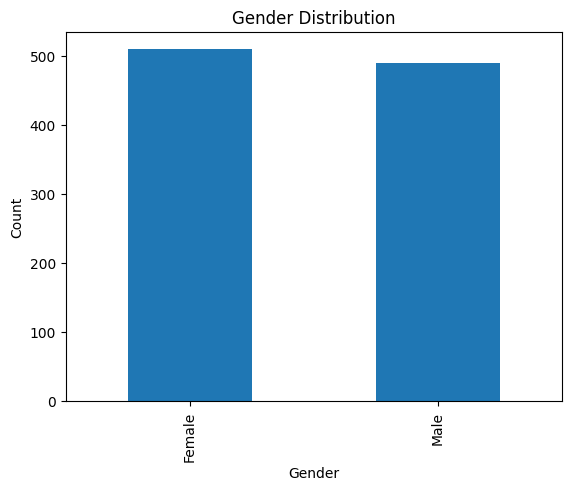

In [11]:
# Gender Distribution
data['Gender'].value_counts().plot(kind = 'bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

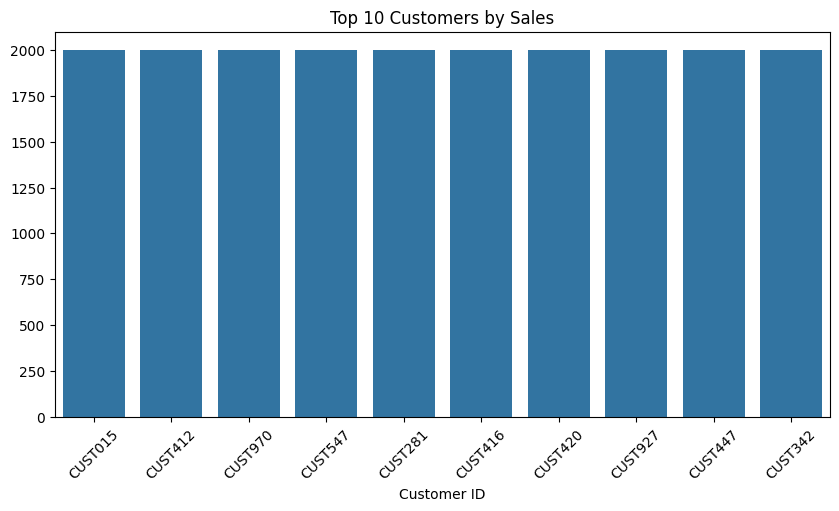

In [32]:
# Customer Analysis
top_customers = data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Sales')
plt.xticks(rotation=45)
plt.show()

In [12]:
import seaborn as sns

Text(0, 0.5, 'Count')

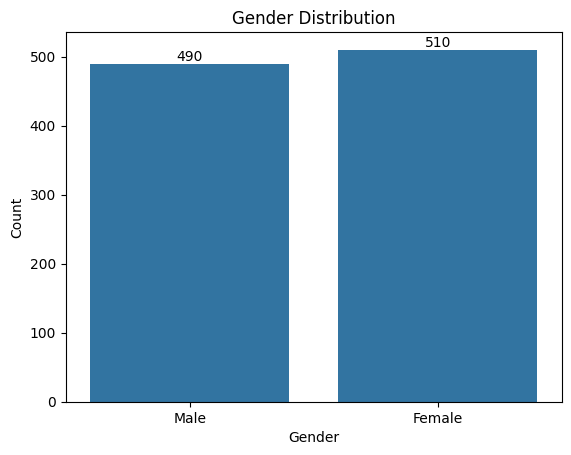

In [27]:
ax = sns.countplot(x='Gender',data = data)
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

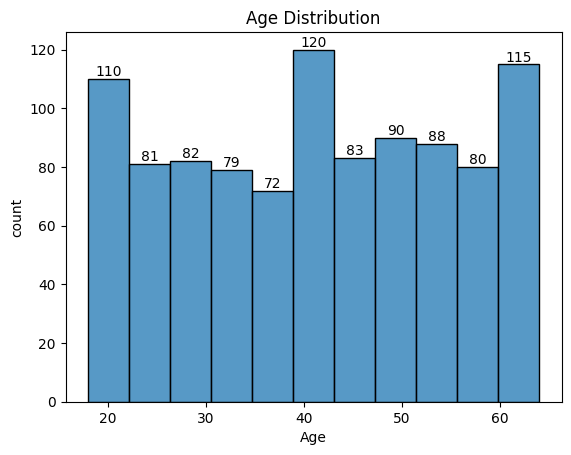

In [25]:
# Age distribution

ax = sns.histplot(x = 'Age',data = data)
ax.bar_label(ax.containers[0])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

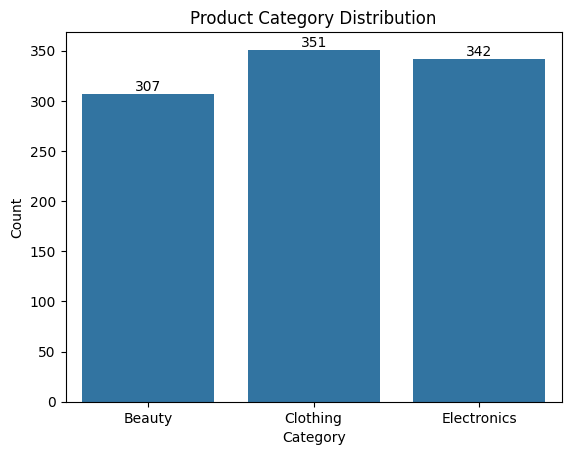

In [22]:
# Product category analysis
ax = sns.countplot(x = 'Product Category',data = data)
ax.bar_label(ax.containers[0])
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

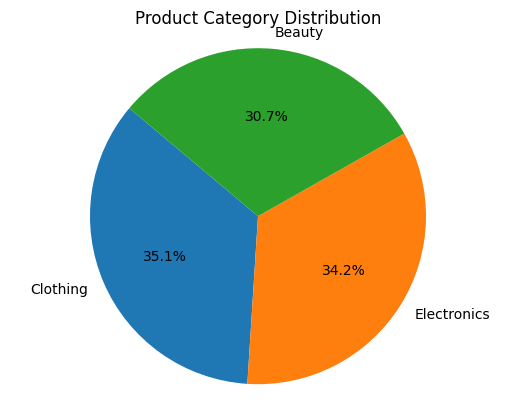

In [17]:
product_counts = data['Product Category'].value_counts()
plt.pie(product_counts,labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# 5. Visualization

In [18]:
# Select Only numerical Culumns
num_columns = data.select_dtypes(include=['int64'])

Text(0.5, 1.0, 'Correlation Heatmap')

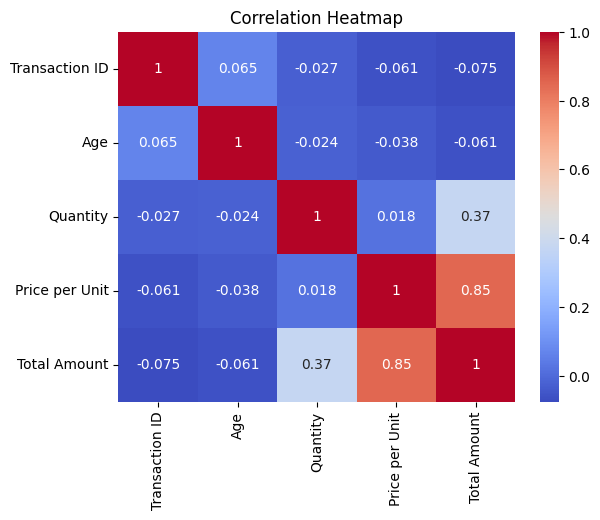

In [19]:
# Correlation heatmap
sns.heatmap(num_columns.corr(), annot=True,cmap = 'coolwarm')
plt.title('Correlation Heatmap')

# 6. Recommendations

Based on the insights gained from the EDA, provide actionable recommendations for the retail business.                                                   
Marketing Strategy: Target specific customer segments based on demographics.                                                                                                                                                         
Inventory Management: Optimize stock levels for popular product categories.                                                                             

Sales Promotions: Plan promotions during periods of low sales to boost revenue.                                                                         

Focus on best-selling product categories to optimize inventory.                                                                                         

Offer targeted promotions to high-value customers.                                                                                                      
   
Adjust pricing strategies based on peak sales trends.                                                                                                   